In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#import the csv file and convert it to a dataframe 

CleanedData_df = pd.read_csv(Path('./Resources/CleanedData.csv'))
CleanedData_df.head()

,Unnamed: 0,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Cancer Severity
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,1
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,3
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,3
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,3


In [4]:
#Remove Patient ID Column
CleanedData_df.drop(columns=["Patient Id"], inplace=True)

CleanedData_df.head()

,Unnamed: 0,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Cancer Severity
0,0,33,1,2,4,5,4,3,2,2,4,3,2,1
1,1,17,1,3,1,5,3,4,2,2,2,2,4,2
2,2,35,1,4,5,6,5,5,4,6,7,2,3,3
3,3,37,1,7,7,7,7,6,7,7,7,7,7,3
4,4,46,1,6,8,7,7,7,6,7,7,8,7,3


In [5]:
CleanedData_df.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
CleanedData_df.dtypes

Age                     int64
Gender                  int64
Air Pollution           int64
Alcohol use             int64
Dust Allergy            int64
OccuPational Hazards    int64
Genetic Risk            int64
chronic Lung Disease    int64
Balanced Diet           int64
Obesity                 int64
Smoking                 int64
Passive Smoker          int64
Cancer Severity         int64
dtype: object

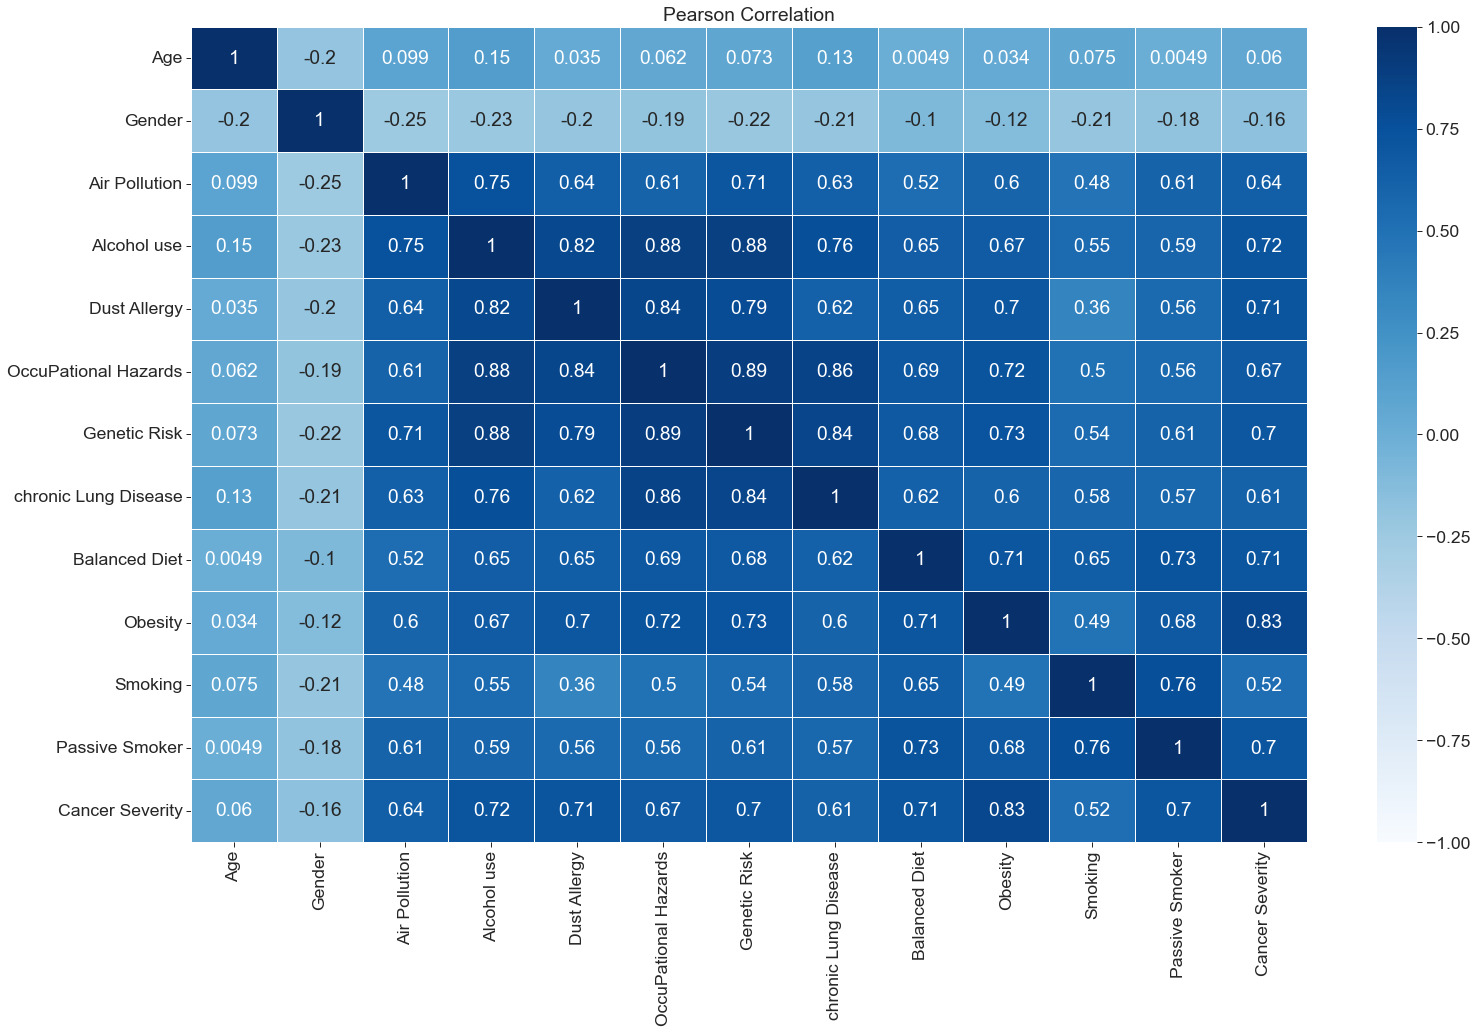

In [27]:
Pearson_correlation = CleanedData_df.corr(method='pearson')

sns.set_theme(context='paper', style='ticks',font_scale=2)
figure = plt.figure(figsize=(25,15))

sns.heatmap(Pearson_correlation,vmin=-1, vmax=+1, cmap='Blues', annot=True,
           linewidths=1, linecolor = 'white')
   
plt.title('Pearson Correlation')
plt.savefig("Resources/images/PC.png")
plt.show()

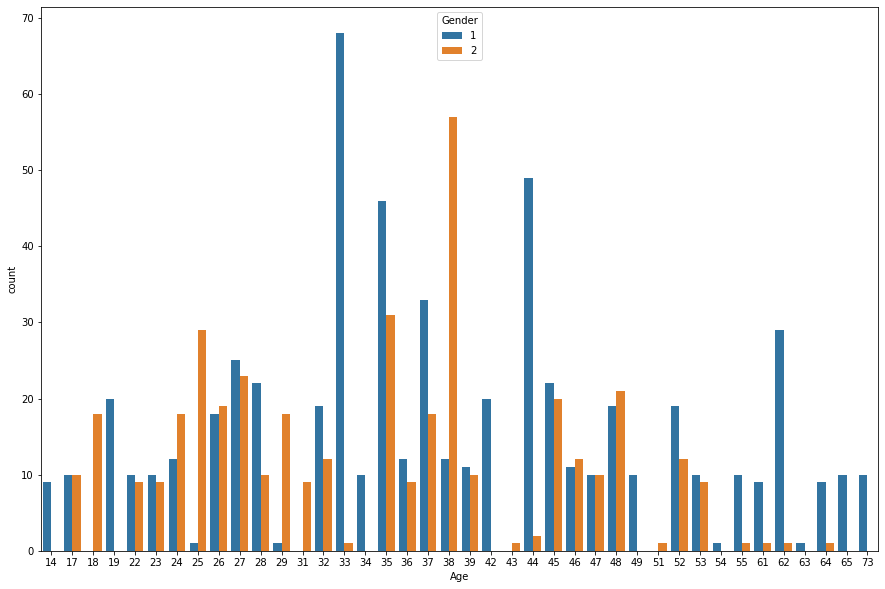

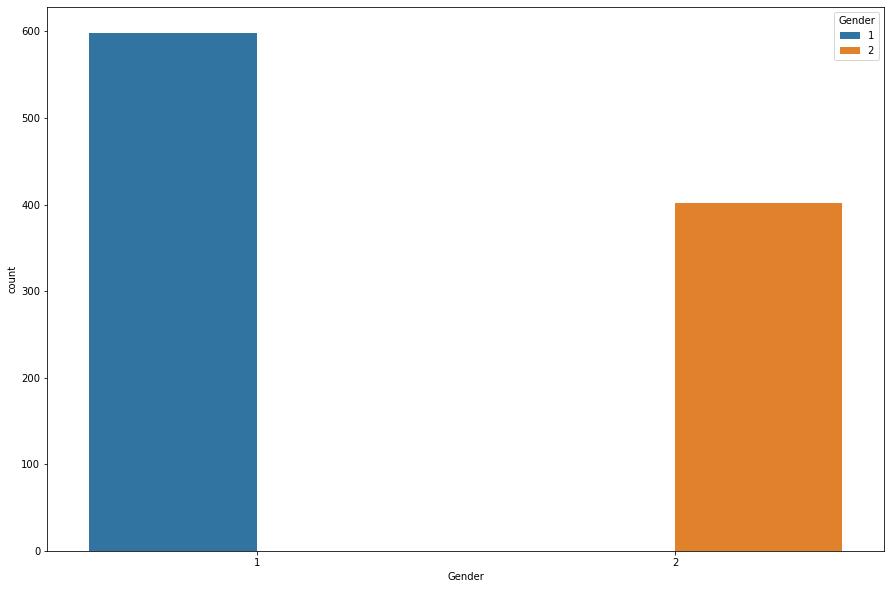

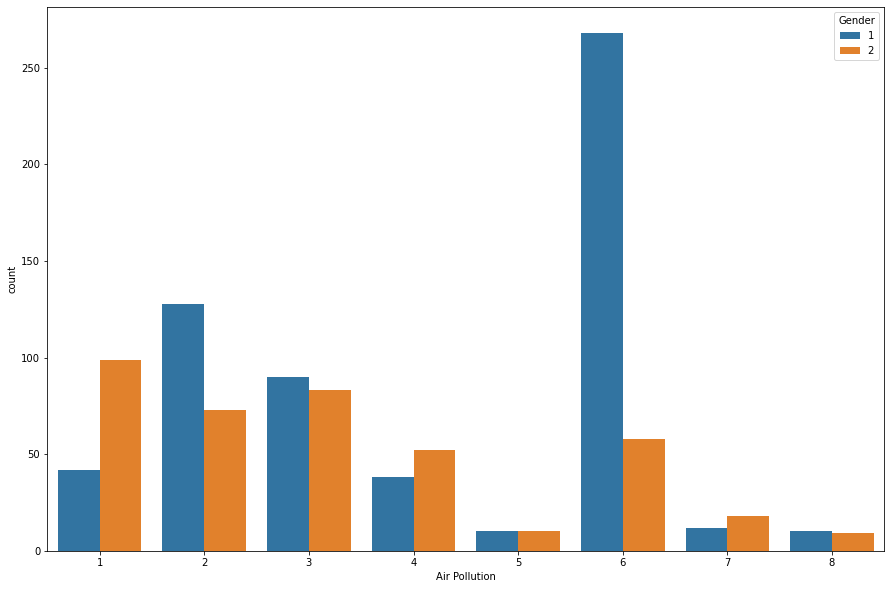

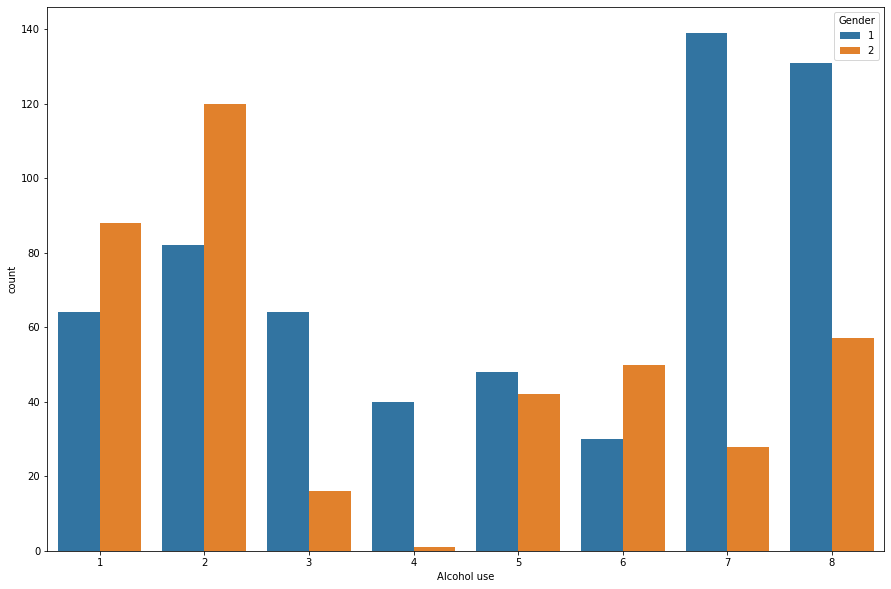

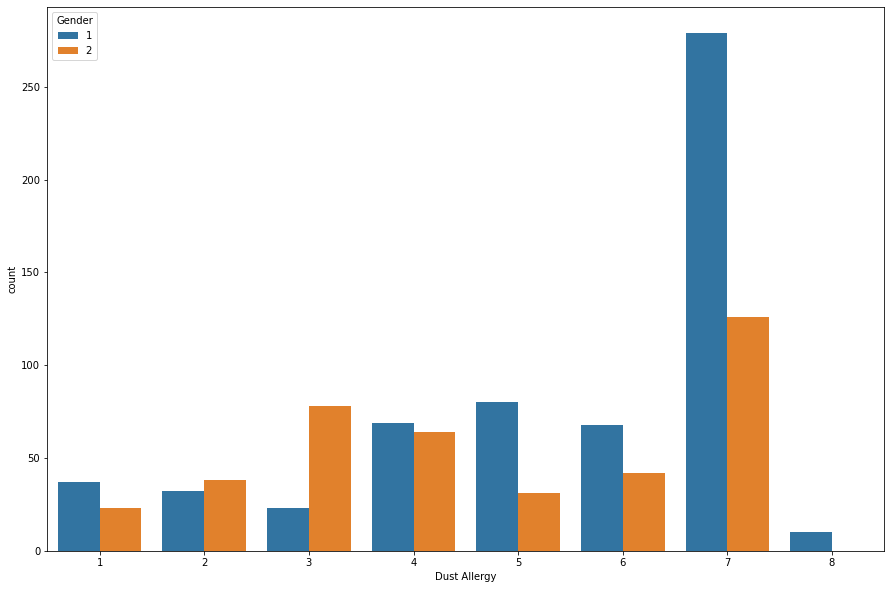

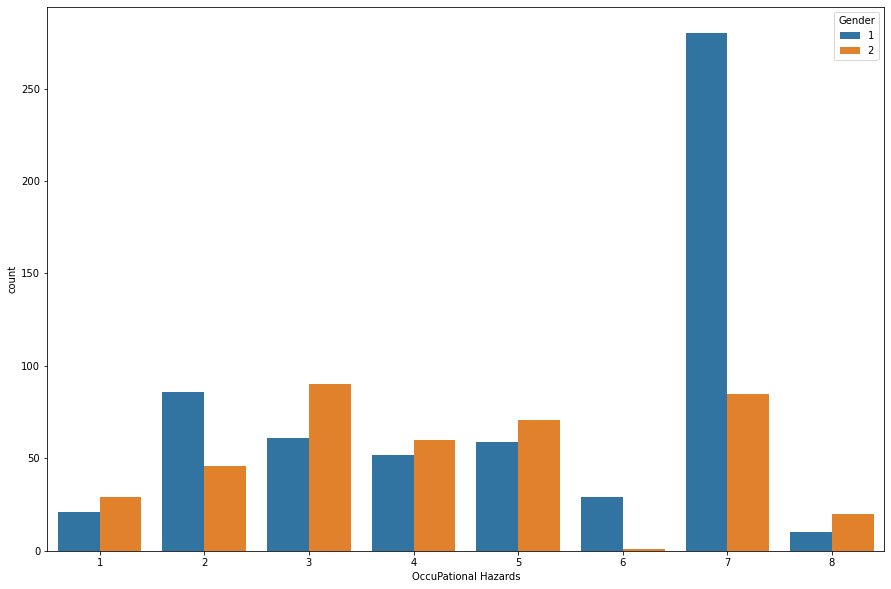

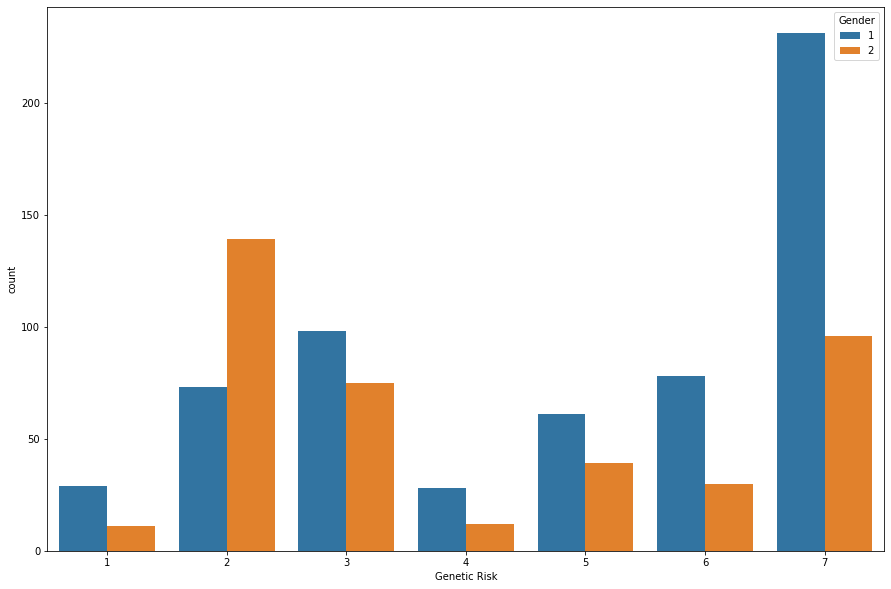

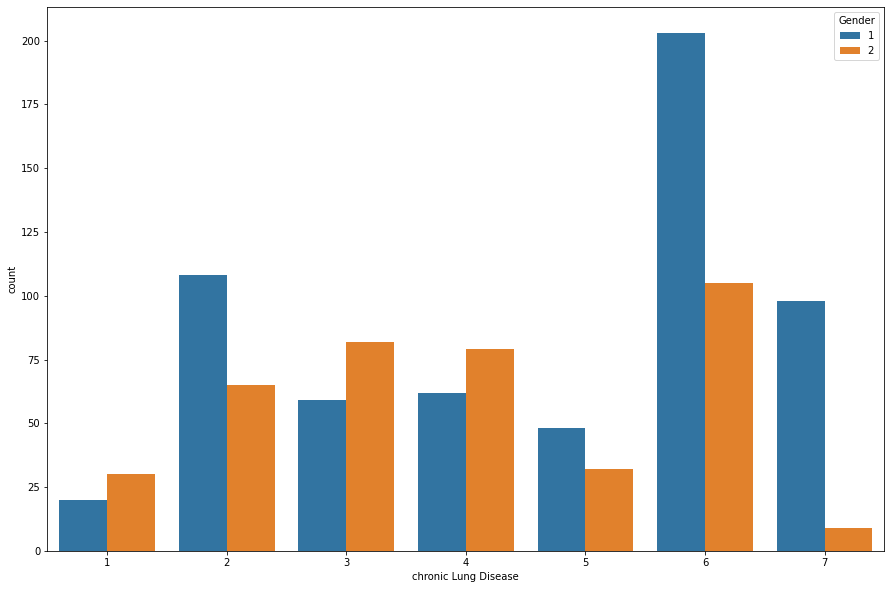

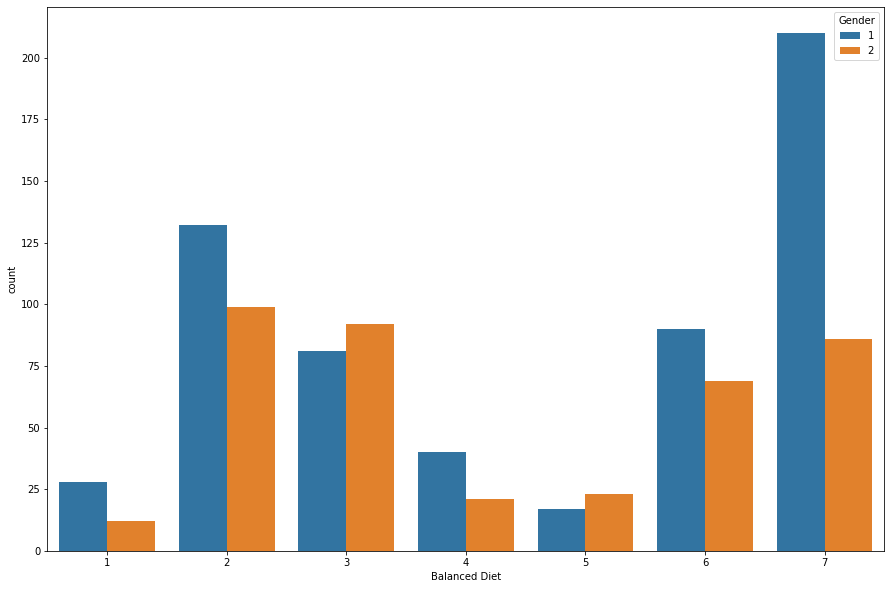

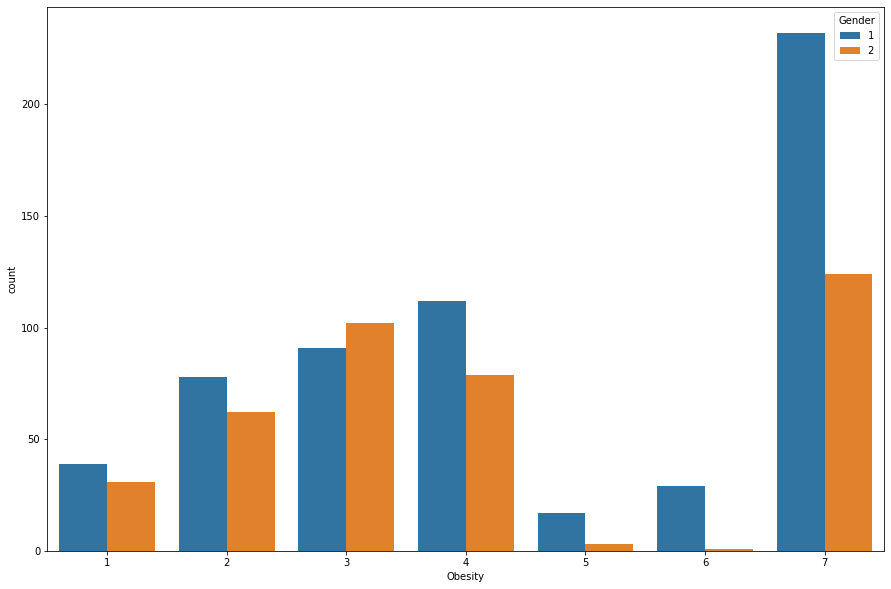

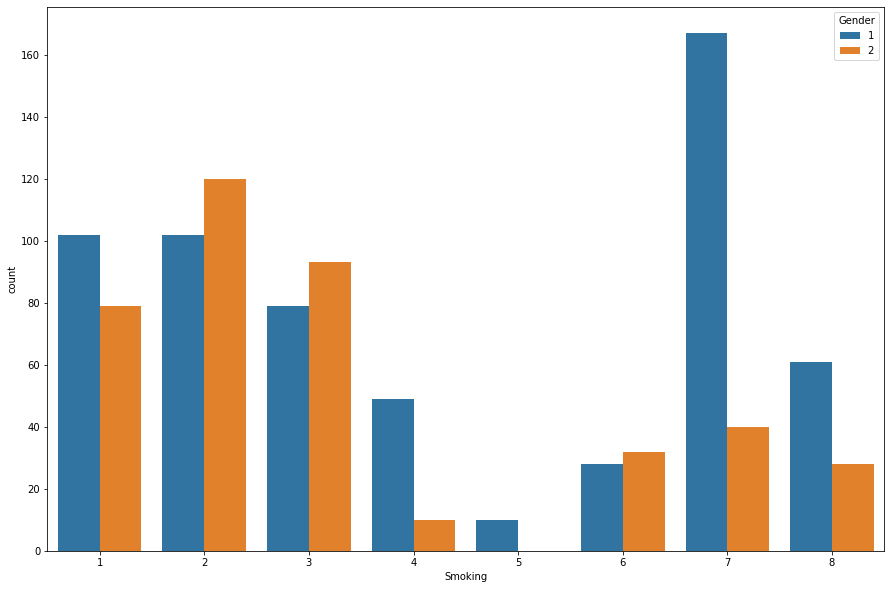

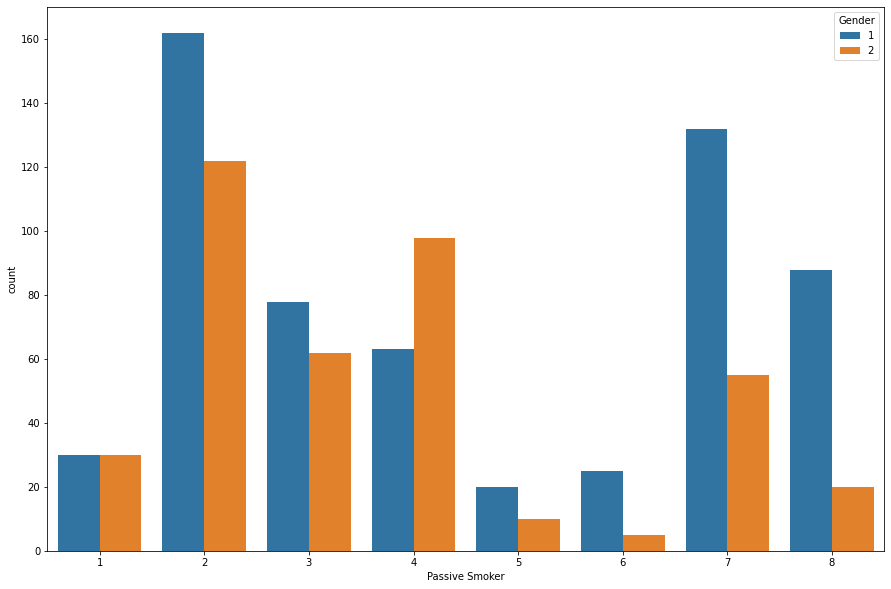

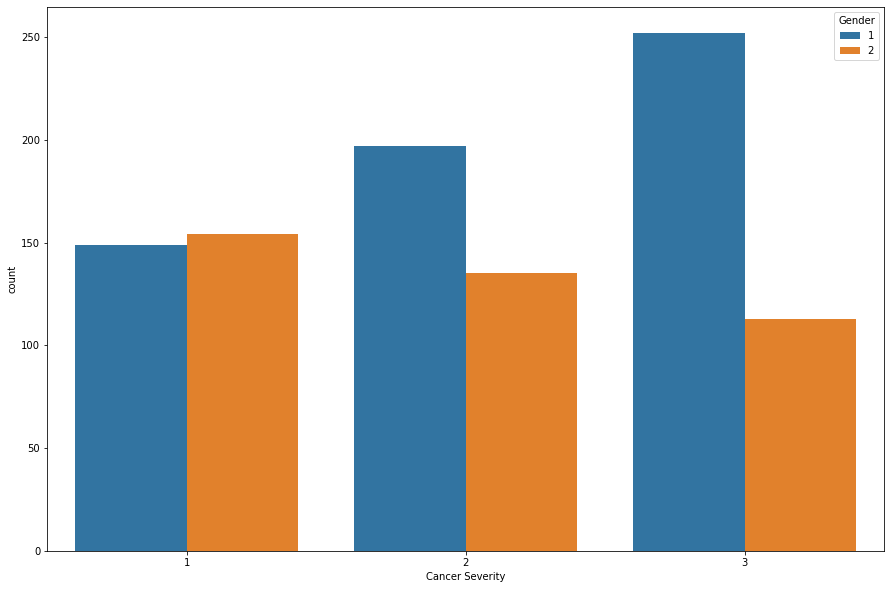

In [8]:
col= CleanedData_df.columns

for i in col:
    figure = plt.figure(figsize=(15,10))
    sns.countplot( x=i, hue='Gender', data=CleanedData_df)
    plt.show()

In [162]:
y = CleanedData_df["Cancer Severity"]
X = CleanedData_df.drop(columns="Cancer Severity")

In [163]:
## Drop Variables Conditionally

X = X.drop(columns="Age")

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,
   y, test_size = 0.3, random_state=44, shuffle = True)
X_train.shape


(700, 11)

In [165]:
#model= LogisticRegression(solver="liblinear").fit(X_train,y_train)
#0.8033

#model = LogisticRegression(solver='lbfgs',
#                                max_iter=200,
#                                random_state=1).fit(x_train, y_train)
#.8366

model = LogisticRegression(solver='newton-cg',
                                max_iter=2000,
                                random_state=1).fit(X_train, y_train)
#.8633

#model = LogisticRegression(solver='sag',
#                                max_iter=200,
#                                random_state=1).fit(x_train, y_train)
#0.7766666666666666


#model = LogisticRegression(solver='saga',
#                                max_iter=200,
#                                random_state=1).fit(x_train, y_train)
#.79
#‘newton-cg’, ‘sag’, ‘saga’ 


In [166]:
y_pred = model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,1
1,2,2
2,1,1
3,3,3
4,3,3
5,3,3
6,2,2
7,2,2
8,2,2
9,2,2


In [167]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8666666666666667


In [168]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# Calculating the confusion matrix
#cm = confusion_matrix(y_test, predictions)


# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual Low", "Actual Medium", "Actual High"], columns=["Predicted Low", "Predicted Medium", "Predicted High"])

cm_df

,Predicted Low,Predicted Medium,Predicted High
Actual Low,77,18,0
Actual Medium,18,88,4
Actual High,0,0,95


In [169]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.8666666666666667

In [170]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [171]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [172]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,1,1
1,2,2
2,1,1
3,3,3
4,3,3


In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8766666666666667

In [174]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)

# Calculating the confusion matrix
#cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    matrix, index=["Actual Low", "Actual Medium", "Actual High"], columns=["Predicted Low", "Predicted Medium", "Predicted High"])

cm_df

,Predicted Low,Predicted Medium,Predicted High
Actual Low,76,19,0
Actual Medium,18,92,0
Actual High,0,0,95


In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.81      0.80      0.80        95
           2       0.83      0.84      0.83       110
           3       1.00      1.00      1.00        95

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [176]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)
acc_score


0.8766666666666667